In [1]:
import pickle
from pprint import pprint
import re
import matplotlib.pyplot as plt

with open('best_score.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
def filter_data(data, **filters):
    """
    Filtra un diccionario según los parámetros proporcionados en los filtros.
    
    :param data: Diccionario de datos (claves como string, valores como float).
    :param filters: Parámetros para filtrar, e.g., dmodel=1024, head=16.
    :return: Diccionario filtrado.
    """
    filtered = {}
    for key, value in data.items():
        match = True
        for param, expected_value in filters.items():
            # Crear un patrón para buscar "param_expectedvalue" en la clave
            pattern = fr"{param}_{expected_value}"
            if not re.search(pattern, key):
                match = False
                break
        if match:
            filtered[key] = value
    return filtered

embedding_filter = {'head': 2, 'layer': 2, 'bs': 512}
head_filter = {'dmodel': 512, 'layer': 2, 'bs': 512}
layer_filter = {'dmodel': 512, 'head': 2, 'bs': 512}

embedding_filtered_data = filter_data(data, **embedding_filter)
head_filtered_data = filter_data(data, **head_filter)
layer_filtered_data = filter_data(data, **layer_filter)

In [3]:
# Extraer los valores de dmodel usando una expresión regular
embedding_values = []
embedding_accuracy_values = []

for key, value in embedding_filtered_data.items():
    match = re.search(r"dmodel_(\d+)", key)  # Buscar "dmodel_X"
    if match:
        embedding_values.append(int(match.group(1)))  # Extraer el valor numérico de dmodel
        embedding_accuracy_values.append(value)

# Ordenar los valores por dmodel para una gráfica más limpia
sorted_data = sorted(zip(embedding_values, embedding_accuracy_values))
embedding_values, embedding_accuracy_values = zip(*sorted_data)

In [4]:
# Extraer los valores de head usando una expresión regular
head_values = []
head_accuracy_values = []

for key, value in head_filtered_data.items():
    match = re.search(r"head_(\d+)", key)  # Buscar "head_X"
    if match:
        head_values.append(int(match.group(1)))  # Extraer el valor numérico de head
        head_accuracy_values.append(value)

# Ordenar los valores por head para una gráfica más limpia
sorted_data = sorted(zip(head_values, head_accuracy_values))
head_values, head_accuracy_values = zip(*sorted_data)

In [5]:
# Extraer los valores de layer usando una expresión regular
layer_values = []
layer_accuracy_values = []

for key, value in layer_filtered_data.items():
    match = re.search(r"layer_(\d+)", key)  # Buscar "layer_X"
    if match:
        layer_values.append(int(match.group(1)))  # Extraer el valor numérico de layer
        layer_accuracy_values.append(value)

# Ordenar los valores por layer para una gráfica más limpia
sorted_data = sorted(zip(layer_values, layer_accuracy_values))
layer_values, layer_accuracy_values = zip(*sorted_data)

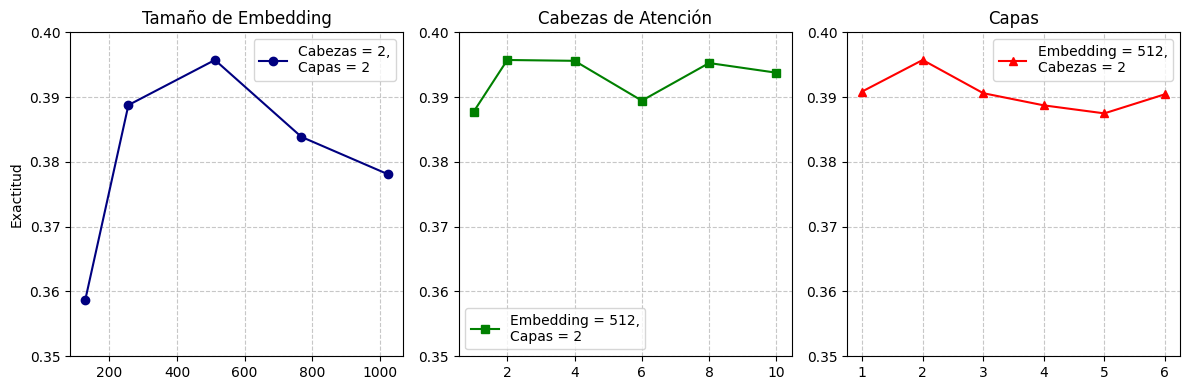

In [8]:
# Configuración de tamaño de figura
plt.figure(figsize=(12, 4))  # Ancho más grande para mostrar los gráficos uno al lado del otro

# Rango uniforme para el eje Y
y_min, y_max = 0.350, 0.4 

# Gráfica de Tamaño Embedding
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
plt.plot(embedding_values, embedding_accuracy_values, marker="o", color="navy")
plt.title("Tamaño de Embedding", fontsize=12)
plt.legend(["Cabezas = 2,\nCapas = 2"], fontsize=10)  # Leyenda especificando valores fijos
plt.grid(True, linestyle="--", alpha=0.7)
plt.ylim(y_min, y_max)  # Fijar el rango del eje Y
plt.ylabel("Exactitud")  # Nombre del eje Y en la primera gráfica

# Gráfica de Cabezas de Atención
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
plt.plot(head_values[:-1], head_accuracy_values[:-1], label="Embedding = 512,\nCapas = 2", marker="s", color="green")
plt.title("Cabezas de Atención", fontsize=12)
plt.legend(fontsize=10)  # Leyenda especificando valores fijos
plt.grid(True, linestyle="--", alpha=0.7)
plt.ylim(y_min, y_max)  # Fijar el rango del eje Y

# Gráfico de Capas
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
plt.plot(layer_values[:-2], layer_accuracy_values[:-2], marker="^", color="red")
plt.title("Capas", fontsize=12)
plt.legend(["Embedding = 512,\nCabezas = 2"], fontsize=10)  # Leyenda especificando valores fijos
plt.grid(True, linestyle="--", alpha=0.7)
plt.ylim(y_min, y_max)  # Fijar el rango del eje Y

# Ajustar diseño para que los gráficos no se solapen
plt.tight_layout()

# Mostrar las gráficas
plt.show()
